<a href="https://colab.research.google.com/github/Amaliaaap/Project/blob/main/UTS%20Machine%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**WINE QUALITY CLASSIFICATION**

By : Dian Amalia Putri / 4112322018

# **1. PERSIAPAN DATA**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from collections import Counter

In [6]:
df_train = pd.read_csv('/content/drive/MyDrive/UTS ML/data_training.csv')

In [8]:
df_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.3,0.740,0.08,1.7,0.094,10.0,45.0,0.99576,3.24,0.50,9.8,5,1366
1,8.1,0.575,0.22,2.1,0.077,12.0,65.0,0.99670,3.29,0.51,9.2,5,103
2,10.1,0.430,0.40,2.6,0.092,13.0,52.0,0.99834,3.22,0.64,10.0,7,942
3,12.9,0.500,0.55,2.8,0.072,7.0,24.0,1.00012,3.09,0.68,10.9,6,811
4,8.4,0.360,0.32,2.2,0.081,32.0,79.0,0.99640,3.30,0.72,11.0,6,918
...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,6.7,1.040,0.08,2.3,0.067,19.0,32.0,0.99648,3.52,0.57,11.0,4,1467
853,8.0,0.390,0.30,1.9,0.074,32.0,84.0,0.99717,3.39,0.61,9.0,5,1533
854,7.4,0.350,0.33,2.4,0.068,9.0,26.0,0.99470,3.36,0.60,11.9,6,1580
855,7.9,0.570,0.31,2.0,0.079,10.0,79.0,0.99677,3.29,0.69,9.5,6,1216


# **2. PEMBERSIHAN DATA**

In [9]:
df_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000
mean,8.261960,0.529393,0.267351,2.506184,0.086830,15.782964,45.978413,0.996692,3.313092,0.656709,10.430338,5.653442,813.749125
std,1.701992,0.179162,0.195144,1.293512,0.048721,10.300402,31.692113,0.001901,0.152079,0.167364,1.066971,0.821777,463.807063
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.390000,8.400000,3.000000,0.000000
25%,7.100000,0.395000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995520,3.210000,0.550000,9.500000,5.000000,413.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,14.000000,38.000000,0.996680,3.310000,0.620000,10.200000,6.000000,814.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,63.000000,0.997800,3.400000,0.730000,11.100000,6.000000,1214.000000
max,15.600000,1.580000,1.000000,15.500000,0.611000,68.000000,278.000000,1.003200,4.010000,2.000000,14.000000,8.000000,1597.000000


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         857 non-null    float64
 1   volatile acidity      857 non-null    float64
 2   citric acid           857 non-null    float64
 3   residual sugar        857 non-null    float64
 4   chlorides             857 non-null    float64
 5   free sulfur dioxide   857 non-null    float64
 6   total sulfur dioxide  857 non-null    float64
 7   density               857 non-null    float64
 8   pH                    857 non-null    float64
 9   sulphates             857 non-null    float64
 10  alcohol               857 non-null    float64
 11  quality               857 non-null    int64  
 12  Id                    857 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 87.2 KB


Berdasarkan output di atas, dapat terlihat jika tidak terdapat *Missing Value* yang ditandai *non-null* yang berarti semua cell terisi dan tidak perlu penanganan tambahan.

In [11]:
df_train['quality'].value_counts()

,count
quality,
5,362
6,341
7,109
4,26
8,13
3,6


**DATA VISUALIZATION**

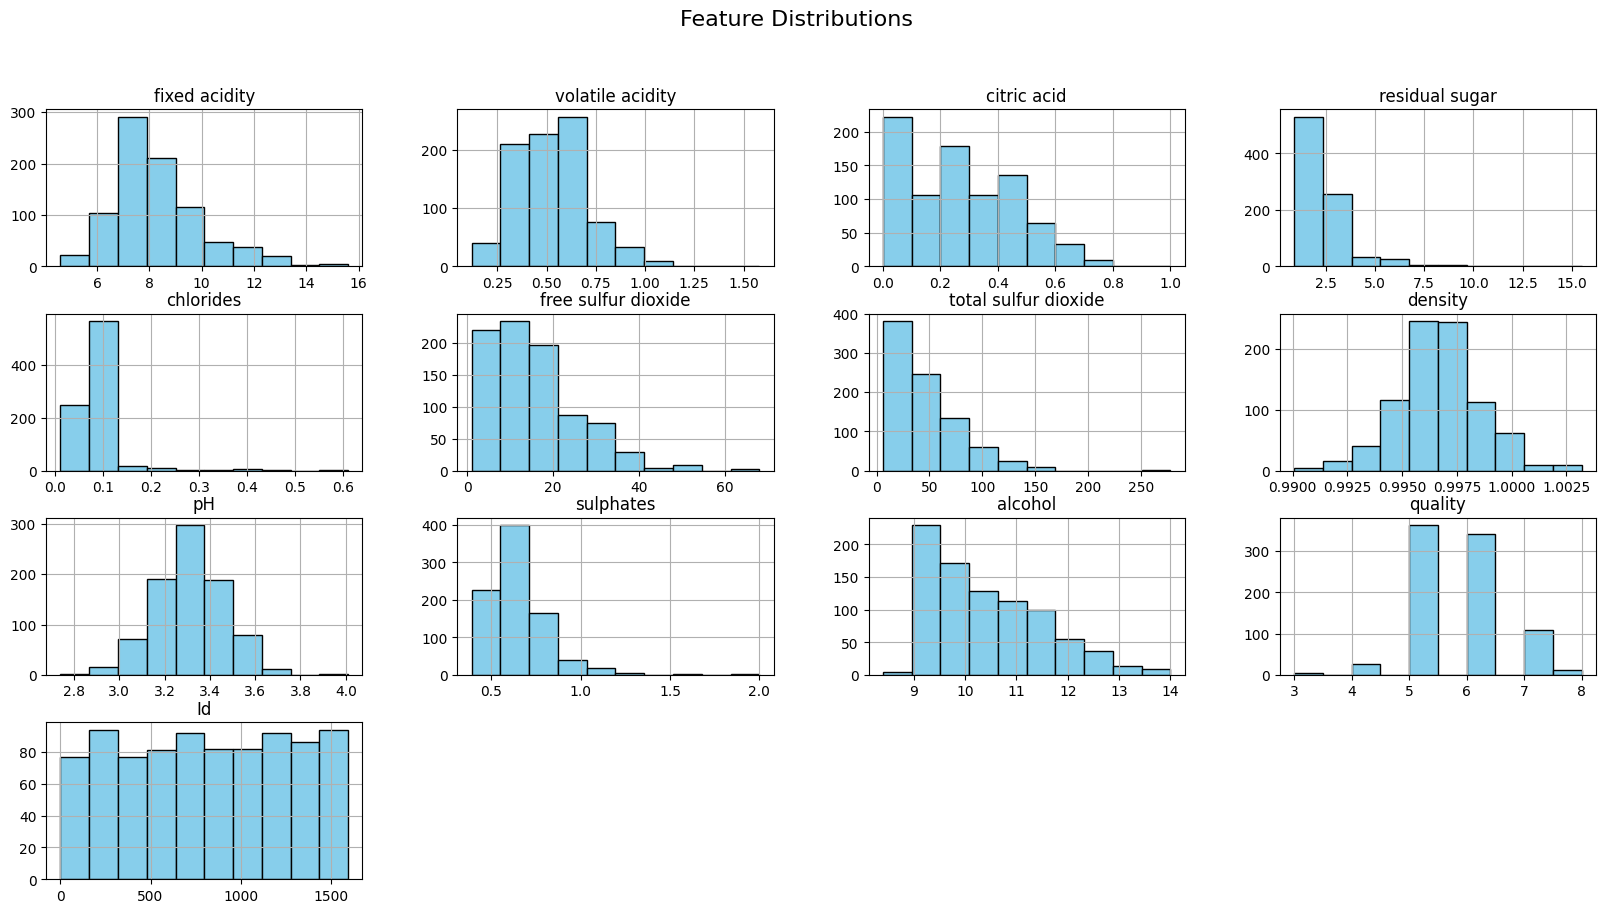

In [12]:
df_train.hist(figsize=(20, 10), bins=10, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

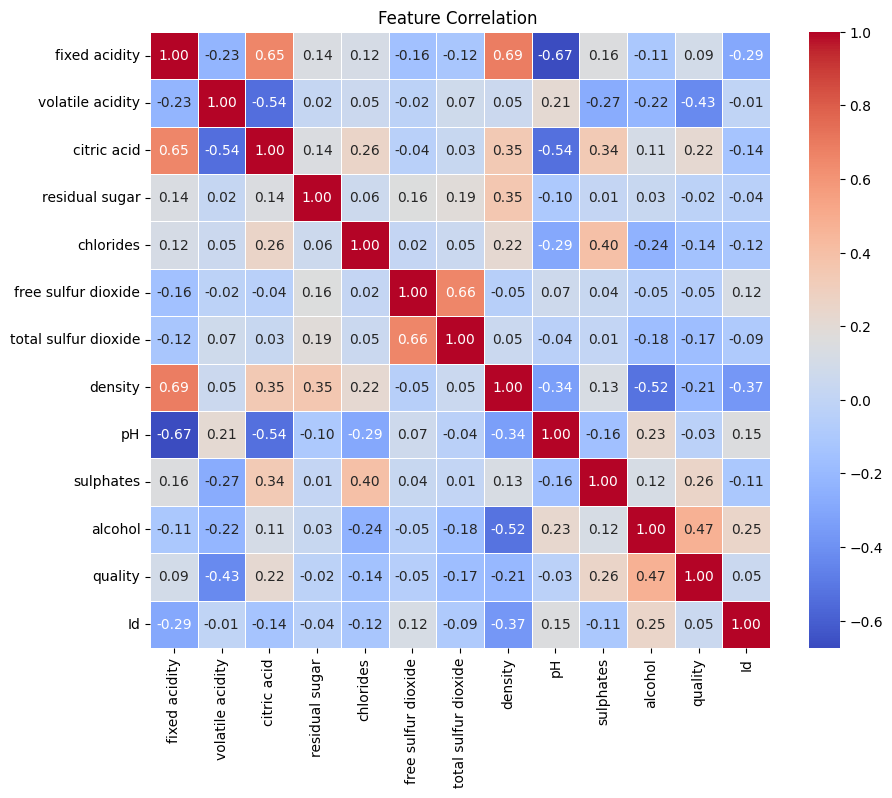

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_train.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation ")
plt.show()

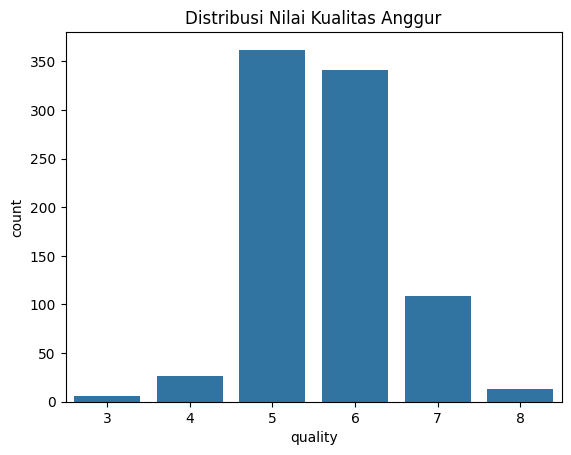

In [14]:
sns.countplot(x='quality', data=df_train)
plt.title("Distribusi Nilai Kualitas Anggur")
plt.show()

Plot di atas menunjukkan distribusi nilai kualitas anggur yang terdapat pada dataset training. Nilai kualitas ini berada pada skala dari 0 hingga 10, namun dalam dataset ini hanya ditemukan nilai dari 3 hingga 8, dengan kualitas 5 dan 6 mendominasi dataset di mana masing-masing berjumlah lebih dari 300 sampel. Dataset ini tidak seimbang (imbalanced dataset) karena sebagaian besar data terkonsentrasi pada kualitas 5 dan 6. Sehingga kita perlu melakukan penyeimbangan data agar model tidak bias terhadap kelas mayoritas.


**SMOTE**

In [15]:
X = df_train.drop(columns=['quality'])
y = df_train['quality']

print("Distribusi sebelum SMOTE:", Counter(y))

Distribusi sebelum SMOTE: Counter({5: 362, 6: 341, 7: 109, 4: 26, 8: 13, 3: 6})


In [16]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Distribusi setelah SMOTE:", Counter(y_resampled))

Distribusi setelah SMOTE: Counter({5: 362, 7: 362, 6: 362, 4: 362, 8: 362, 3: 362})


# **3. PEMBUATAN MODEL**

**FEATURE SCALING**

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

**SPLIT DATA**

In [18]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

**MODELLING**

**a. Random Forest**

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)
acc_rf = accuracy_score(y_val, y_pred_rf)

**b. Logistic regression**

In [20]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train, y_train)
y_pred_lr = lr.predict(X_val)
acc_lr = accuracy_score(y_val, y_pred_lr)

**c. SVM**

In [21]:
from sklearn.svm import SVC
svm_model = SVC().fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_val)
acc_svm = accuracy_score(y_val, y_pred_svm)

**d. Decision Tree**

In [22]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier().fit(X_train, y_train)
y_pred_dt =dt.predict(X_val)
acc_dt =  accuracy_score(y_val, y_pred_dt)


**e. K-Nearest Neighbors**

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(X_train, y_train)
y_pred_knn = knn.predict(X_val)
acc_knn = accuracy_score(y_val, y_pred_knn)

**f. Gradient Boosting**

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier().fit(X_train, y_train)
y_pred_gb = gb.predict(X_val)
acc_gb = accuracy_score(y_val, y_pred_gb)

In [25]:
print('='*50)
print('PERBANDINGAN AKURASI MODEL')
print('='*50)

df_perbandingan = pd.DataFrame({
    'Model':['Random Forest','Logistic Regression','SVM','Decision Tree', 'KNN', 'Gradient Boosting'],
    'Akurasi':[acc_rf, acc_lr,acc_svm, acc_dt, acc_knn, acc_gb]
})

print(df_perbandingan)

PERBANDINGAN AKURASI MODEL
                 Model   Akurasi
0        Random Forest  0.843678
1  Logistic Regression  0.650575
2                  SVM  0.756322
3        Decision Tree  0.797701
4                  KNN  0.774713
5    Gradient Boosting  0.802299


Berdasarkan hasil training model di atas, Random Forest (0,85) memiliki nilai akurasi yang tinggi dibandingkan model lain. Dengan akurasi yang tinggi, model ini memberikan performa terbaik dibandingkan model lain dalam dataset ini.

**EVALUASI MODEL**

In [26]:
print("\nClassification Report of Random Forest :\n", classification_report(y_val, y_pred_rf))


Classification Report of Random Forest :
               precision    recall  f1-score   support

           3       0.99      1.00      0.99        76
           4       0.88      0.94      0.91        70
           5       0.67      0.70      0.68        63
           6       0.67      0.54      0.60        74
           7       0.88      0.88      0.88        88
           8       0.93      1.00      0.96        64

    accuracy                           0.84       435
   macro avg       0.83      0.84      0.84       435
weighted avg       0.84      0.84      0.84       435



Accuracy sebesar 0,85 menunjukkan bahwa model mampu membuat prediksi yang benar sebanyak 85% dari seluruh data uji.

Text(0.5, 1.0, 'Random Forest')

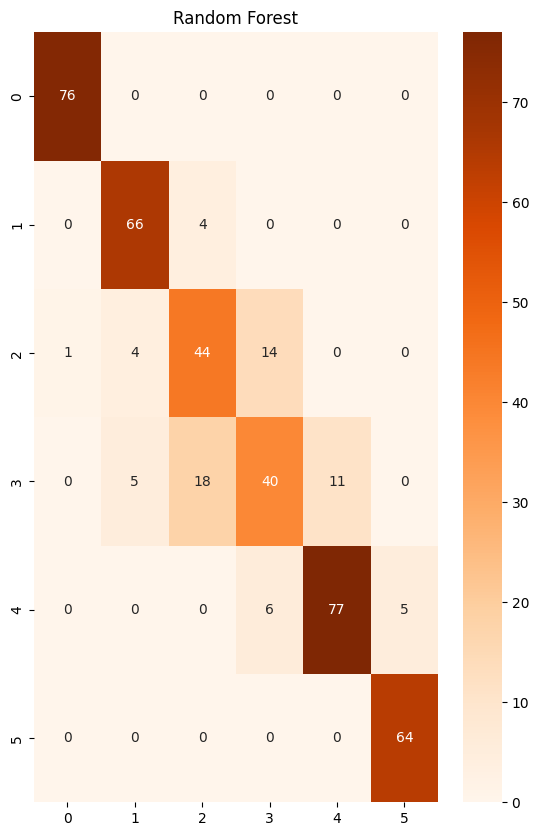

In [27]:
plt.figure(figsize=(30, 10))
plt.subplot(1, 4, 3)
sns.heatmap(confusion_matrix(y_val, y_pred_rf), annot=True, fmt='d', cmap='Oranges')
plt.title("Random Forest")


Confusion Matrix di atas menunjukkan berapa banyak data yang diprediksi model dengan benar atau salah untuk masing-masing kelas *quality*.


*   3 (index 0) berhasil mengklasifikasikan 76 data benar sebagai 3.
*   4 (index 1) berhasil mengklasifikasikan 64 data benar sebagai 4, 4 data salah dan masuk di 5, serta 2 data salah masuk di 6.
*   5 (index 2) hanya mengklasifikasikan 46 data benar sebagai 5, 14 data salah masuk di 6, 2 data salah masuk di 4, dan 1 data salah masuk di 3.
*   6 (index 3) hanya mengklasifikasikan 43 data benar sebagai 6, 10 data salah masuk di 7, 18 data salah masuk di 5, dan 1 data salah masuk di 4.
*   7 (index 4) mengklasifikasikan 76 data benar sebagai 7, 6 data salah masuk di 8, 5 data salah masuk di 6, dan 1 data salah masuk di 5.
*   8 (index 5) berhasil mengklasifikasikan 64 data benar sebagai 8.







**TUNNING**

In [28]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit ke data training
grid_search.fit(X_train, y_train)

# Ambil model terbaik
best_rf = grid_search.best_estimator_

# Prediksi pada data validasi
y_pred_rf = best_rf.predict(X_val)

# Evaluasi hasil
acc_rf = accuracy_score(y_val, y_pred_rf)
print(f"Akurasi Random Forest (Tuned): {acc_rf:.4f}")
print("Classification Report:\n", classification_report(y_val, y_pred_rf))
print("Best Parameters:\n", grid_search.best_params_)


Fitting 3 folds for each of 162 candidates, totalling 486 fits
Akurasi Random Forest (Tuned): 0.8621
Classification Report:
               precision    recall  f1-score   support

           3       0.99      1.00      0.99        76
           4       0.93      0.91      0.92        70
           5       0.66      0.78      0.72        63
           6       0.73      0.55      0.63        74
           7       0.87      0.92      0.90        88
           8       0.97      1.00      0.98        64

    accuracy                           0.86       435
   macro avg       0.86      0.86      0.86       435
weighted avg       0.86      0.86      0.86       435

Best Parameters:
 {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}


Hasil evaluasi model Random Forest setelah dilakukan tuning menunjukkan peningkatan kinerja secara umum, ditandai dengan akurasi sebesar 86%, serta nilai *macro average* dan *weighted average* f1-score sebesar 0.86. Hal ini menunjukkan bahwa model telah mampu mengklasifikasikan kualitas anggur dengan lebih baik dan lebih seimbang di berbagai kelas.  

Model menunjukkan performa yang sangat baik pada kelas 3, 4, 7, dan 8. Pada kelas 3 dan 8, model berhasil memprediksi hampir seluruh data dengan benar, terbukti dari nilai recall 1.00 dan f1-score mendekati sempurna (masing-masing 0.99 dan 0.98). Pada kelas 4 dan 7, precision dan recall keduanya berada di atas 0.90, menandakan kestabilan model dalam memprediksi kualitas pada rentang tersebut.

Meskipun performa pada kelas 5 dan 6 masih relatif lebih rendah dibanding kelas lain, model justru memperlihatkan peningkatan f1-score pada kelas 5 menjadi 0.72, menunjukkan bahwa model lebih baik dalam mengenali karakteristik anggur berkualitas sedang. Namun, kelas 6 masih menjadi tantangan, dengan recall hanya 0.55, yang berarti cukup banyak data kelas 6 yang masih salah diklasifikasikan, kemungkinan besar tertukar dengan kelas 5 atau 7 karena kemiripan fitur kimia.

Text(0.5, 1.0, 'Random Forest')

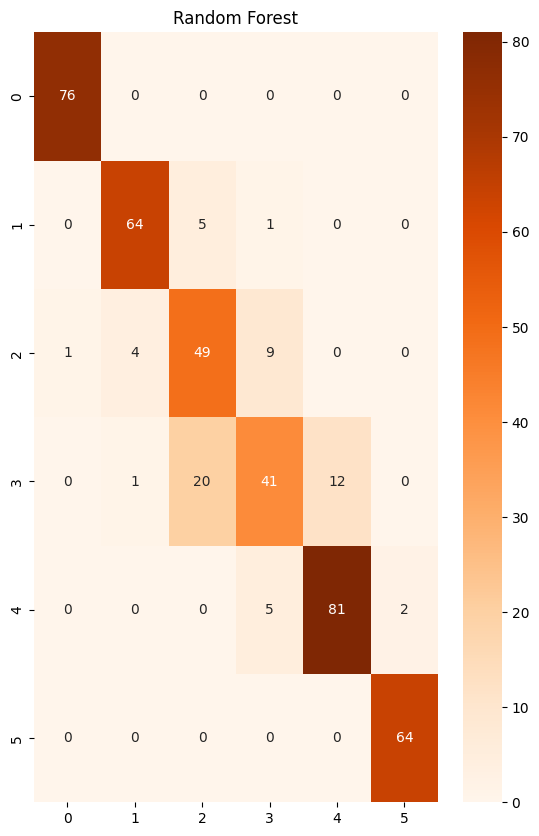

In [29]:
plt.figure(figsize=(30, 10))
plt.subplot(1, 4, 3)
sns.heatmap(confusion_matrix(y_val, y_pred_rf), annot=True, fmt='d', cmap='Oranges')
plt.title("Random Forest")

Setelah dilakukannya tunning hyperparameter pada model Random Forest menggunakan GridSearchCV, performa model secara keseluruhan menunjukkan peningkatan yang cukup baik.

In [40]:
best_rf = grid_search.best_estimator_

In [42]:
import joblib

In [51]:
joblib.dump(best_rf, 'model.pkl')

['model.pkl']

In [53]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

# **4. PREDIKSI DATA UJI**

In [54]:
import joblib
import pandas as pd

In [55]:
model = joblib.load('/content/model.pkl')
scaler = joblib.load('/content/scaler.pkl')

In [56]:
df_test = pd.read_csv('/content/drive/MyDrive/UTS ML/data_testing.csv')
df_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
0,6.8,0.610,0.04,1.5,0.057,5.0,10.0,0.99525,3.42,0.60,9.500000,222
1,6.9,0.840,0.21,4.1,0.074,16.0,65.0,0.99842,3.53,0.72,9.233333,1514
2,7.0,0.580,0.12,1.9,0.091,34.0,124.0,0.99560,3.44,0.48,10.500000,417
3,7.8,0.480,0.68,1.7,0.415,14.0,32.0,0.99656,3.09,1.06,9.100000,754
4,12.5,0.600,0.49,4.3,0.100,5.0,14.0,1.00100,3.25,0.74,11.900000,516
...,...,...,...,...,...,...,...,...,...,...,...,...
281,10.0,0.410,0.45,6.2,0.071,6.0,14.0,0.99702,3.21,0.49,11.800000,1147
282,10.6,0.830,0.37,2.6,0.086,26.0,70.0,0.99810,3.16,0.52,9.900000,296
283,7.9,0.885,0.03,1.8,0.058,4.0,8.0,0.99720,3.36,0.33,9.100000,170
284,7.3,0.670,0.02,2.2,0.072,31.0,92.0,0.99566,3.32,0.68,11.066667,1439


In [57]:
X_test_scaled = scaler.transform(df_test)

In [58]:
y_pred = model.predict(X_test_scaled)

In [59]:
df_prediksi = pd.DataFrame({
    'Id': df_test['Id'],
    'quality': y_pred
})

In [60]:
df_prediksi.to_csv('hasilprediksi_018.csv', index=False)

In [61]:
df_nyu = pd.read_csv('/content/hasilprediksi_018.csv')
df_nyu

,Id,quality
0,222,5
1,1514,6
2,417,5
3,754,5
4,516,6
...,...,...
281,1147,6
282,296,5
283,170,5
284,1439,6
